
Campaign for selling personal loans.

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

1. Read the column description and ensure you understand each attribute well

2. Study the data distribution in each attribute, share your findings. (5 points)

3. Get the target column distribution. Your comments

4. Split the data into training and test set in the ratio of 70:30 respectively

5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)

6. Print the confusion matrix for all the above models (5 points)

7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)

# I- Read the column description and ensure you understand each attribute well		
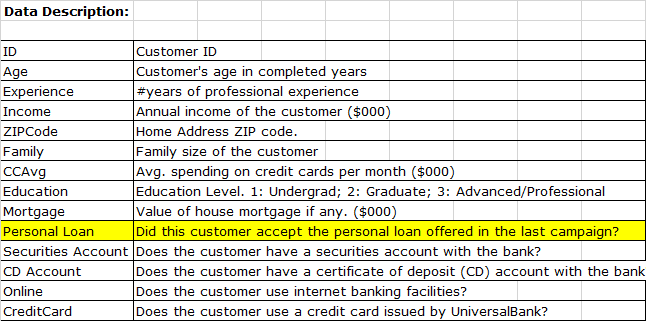

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
%matplotlib inline 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

In [3]:
bank=pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
bank.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
bank.shape

(5000, 14)

In [6]:
#Setting the index as ID
bank.set_index(bank['ID'],inplace=True)
bank.drop(['ID'],inplace=True,axis=1)
bank.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Checking for null values

In [7]:
bank.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


### There are no null values

In [9]:
#Checking for any special characters/undesired data in the dataset
for i in bank.columns:
    print(i,'=',pd.unique(bank[i]))

Age = [25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
Experience = [ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
Income = [ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 224 218]
ZIP Code = [91107 90089 94720 94

### There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values , take absolute values or replace the negative values with median value

In [10]:
# Observing the mean and median of the feature "Experience"
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [11]:
bank[bank['Experience'] < 0]['Experience'].count()

52

In [12]:
bank['Experience']=abs(bank['Experience'])

In [13]:
bank.shape

(5000, 13)

In [14]:
bank[bank['Experience'] < 0]['Experience'].count()

0

In [15]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


In [16]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


### Taking the absolute value does not have a vast difference on the mean and the median of the column "Experience"

In [17]:
bank.var()

Age                   1.314042e+02
Experience            1.303065e+02
Income                2.119104e+03
ZIP Code              4.502257e+06
Family                1.317130e+00
CCAvg                 3.054312e+00
Education             7.053801e-01
Mortgage              1.034570e+04
Personal Loan         8.680136e-02
Securities Account    9.351934e-02
CD Account            5.676319e-02
Online                2.406779e-01
CreditCard            2.076055e-01
dtype: float64

# II- Study the data distribution in each attribute, share your findings. (5 points)

Age                       AxesSubplot(0.125,0.71587;0.168478x0.16413)
Experience             AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Income                 AxesSubplot(0.529348,0.71587;0.168478x0.16413)
ZIP Code               AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Family                   AxesSubplot(0.125,0.518913;0.168478x0.16413)
CCAvg                 AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Education             AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Mortgage              AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Personal Loan            AxesSubplot(0.125,0.321957;0.168478x0.16413)
Securities Account    AxesSubplot(0.327174,0.321957;0.168478x0.16413)
CD Account            AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Online                AxesSubplot(0.731522,0.321957;0.168478x0.16413)
CreditCard                  AxesSubplot(0.125,0.125;0.168478x0.16413)
dtype: object

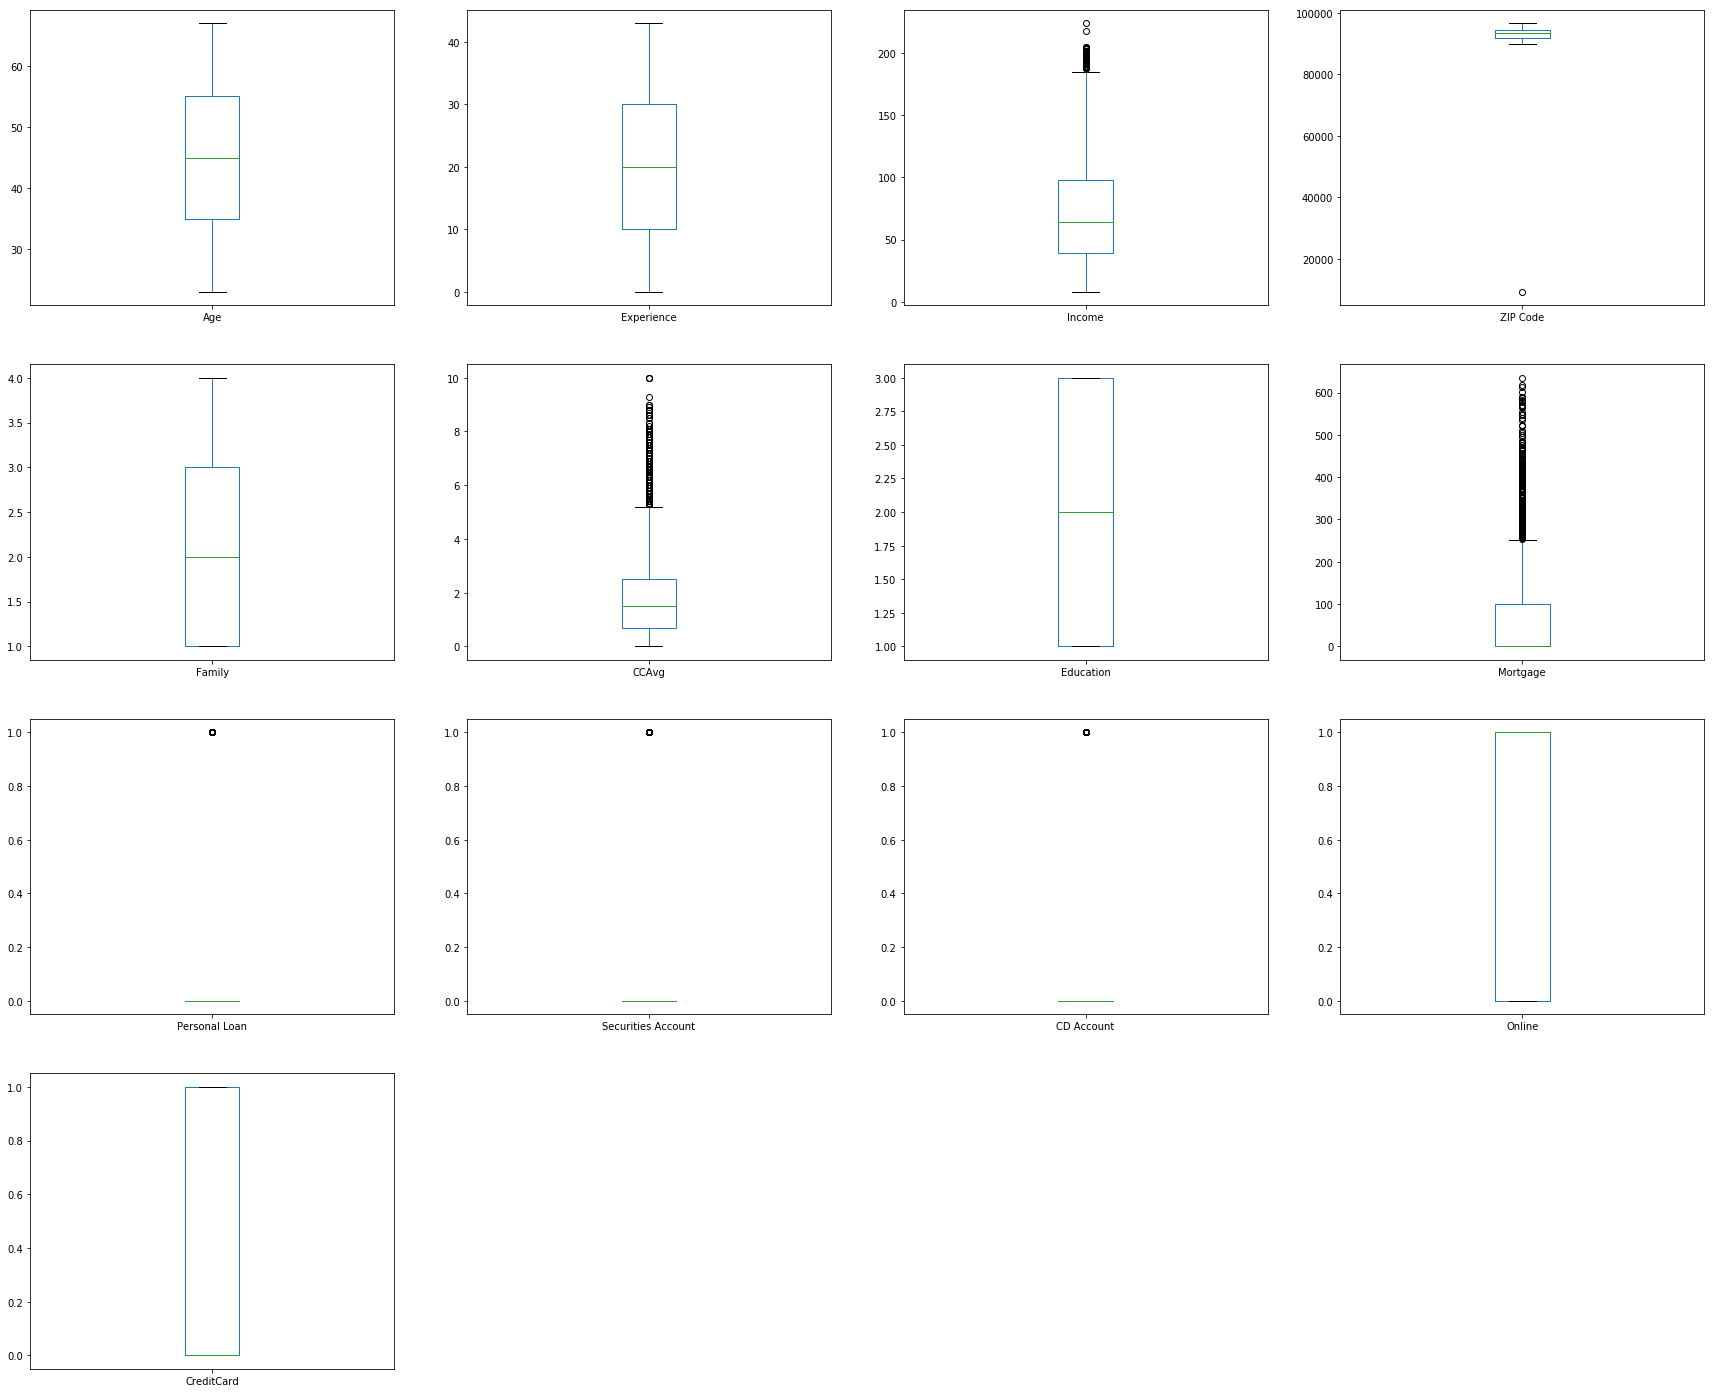

In [18]:
bank.plot(kind= 'box' , layout=(4,4), subplots=True, sharex=False, sharey=False, figsize=(30,25))

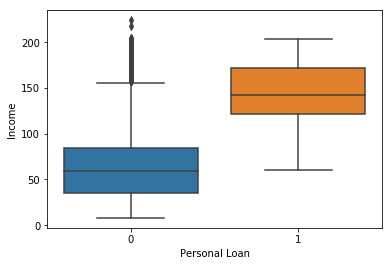

In [19]:
sns.boxplot(bank['Personal Loan'],bank['Income'])

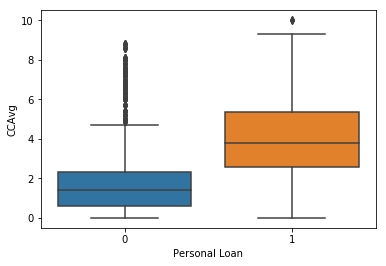

In [20]:
sns.boxplot(bank['Personal Loan'],bank['CCAvg'])

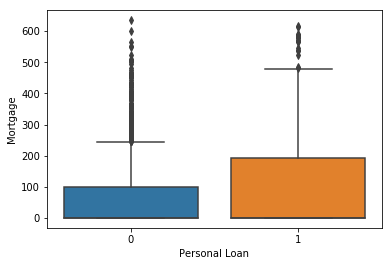

In [21]:
sns.boxplot(bank['Personal Loan'],bank['Mortgage'])

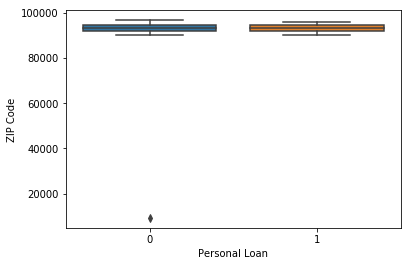

In [22]:
sns.boxplot(bank['Personal Loan'],bank['ZIP Code'])

###  From the boxplots, presence of Outliers can be observed for the variables Income, CCavg,Zip Code and Mortgage.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023CF36DCB00>,
      dtype=object)

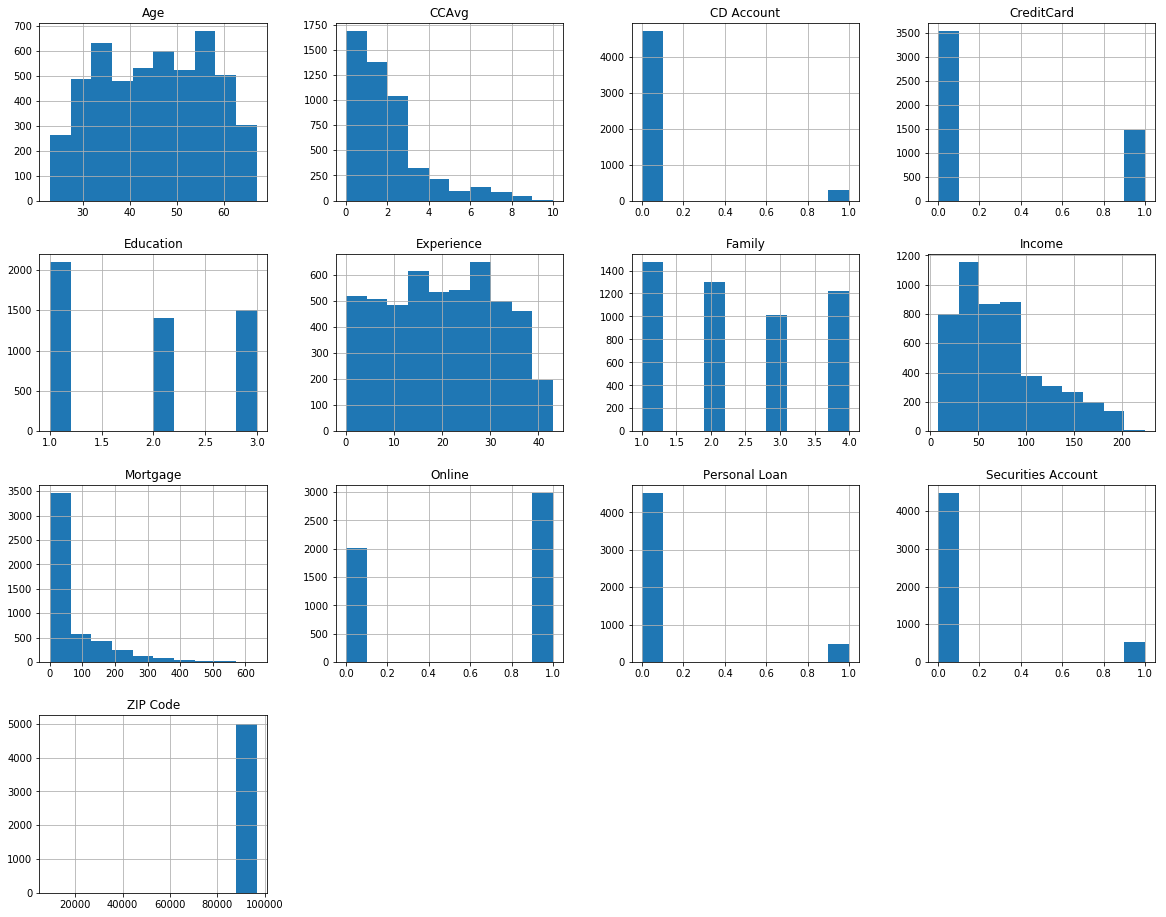

In [23]:
bank.hist(figsize=(20,16))

1. Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. Here it shows the mean is almost equal to median
2. Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience. This could be a data input error.
3. Income is positively skewed. Majority of the customers have income between 30K and 55K. We can confirm this by saying the mean is greater than the median
4. CCAvg is also a positively skewed (Right skewed) variable and average spending is between 0K to 10K and majority spends less than 2.5K
5. Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K
6. The variables family and education are ordinal variables. The distribution of families is evenly distributes

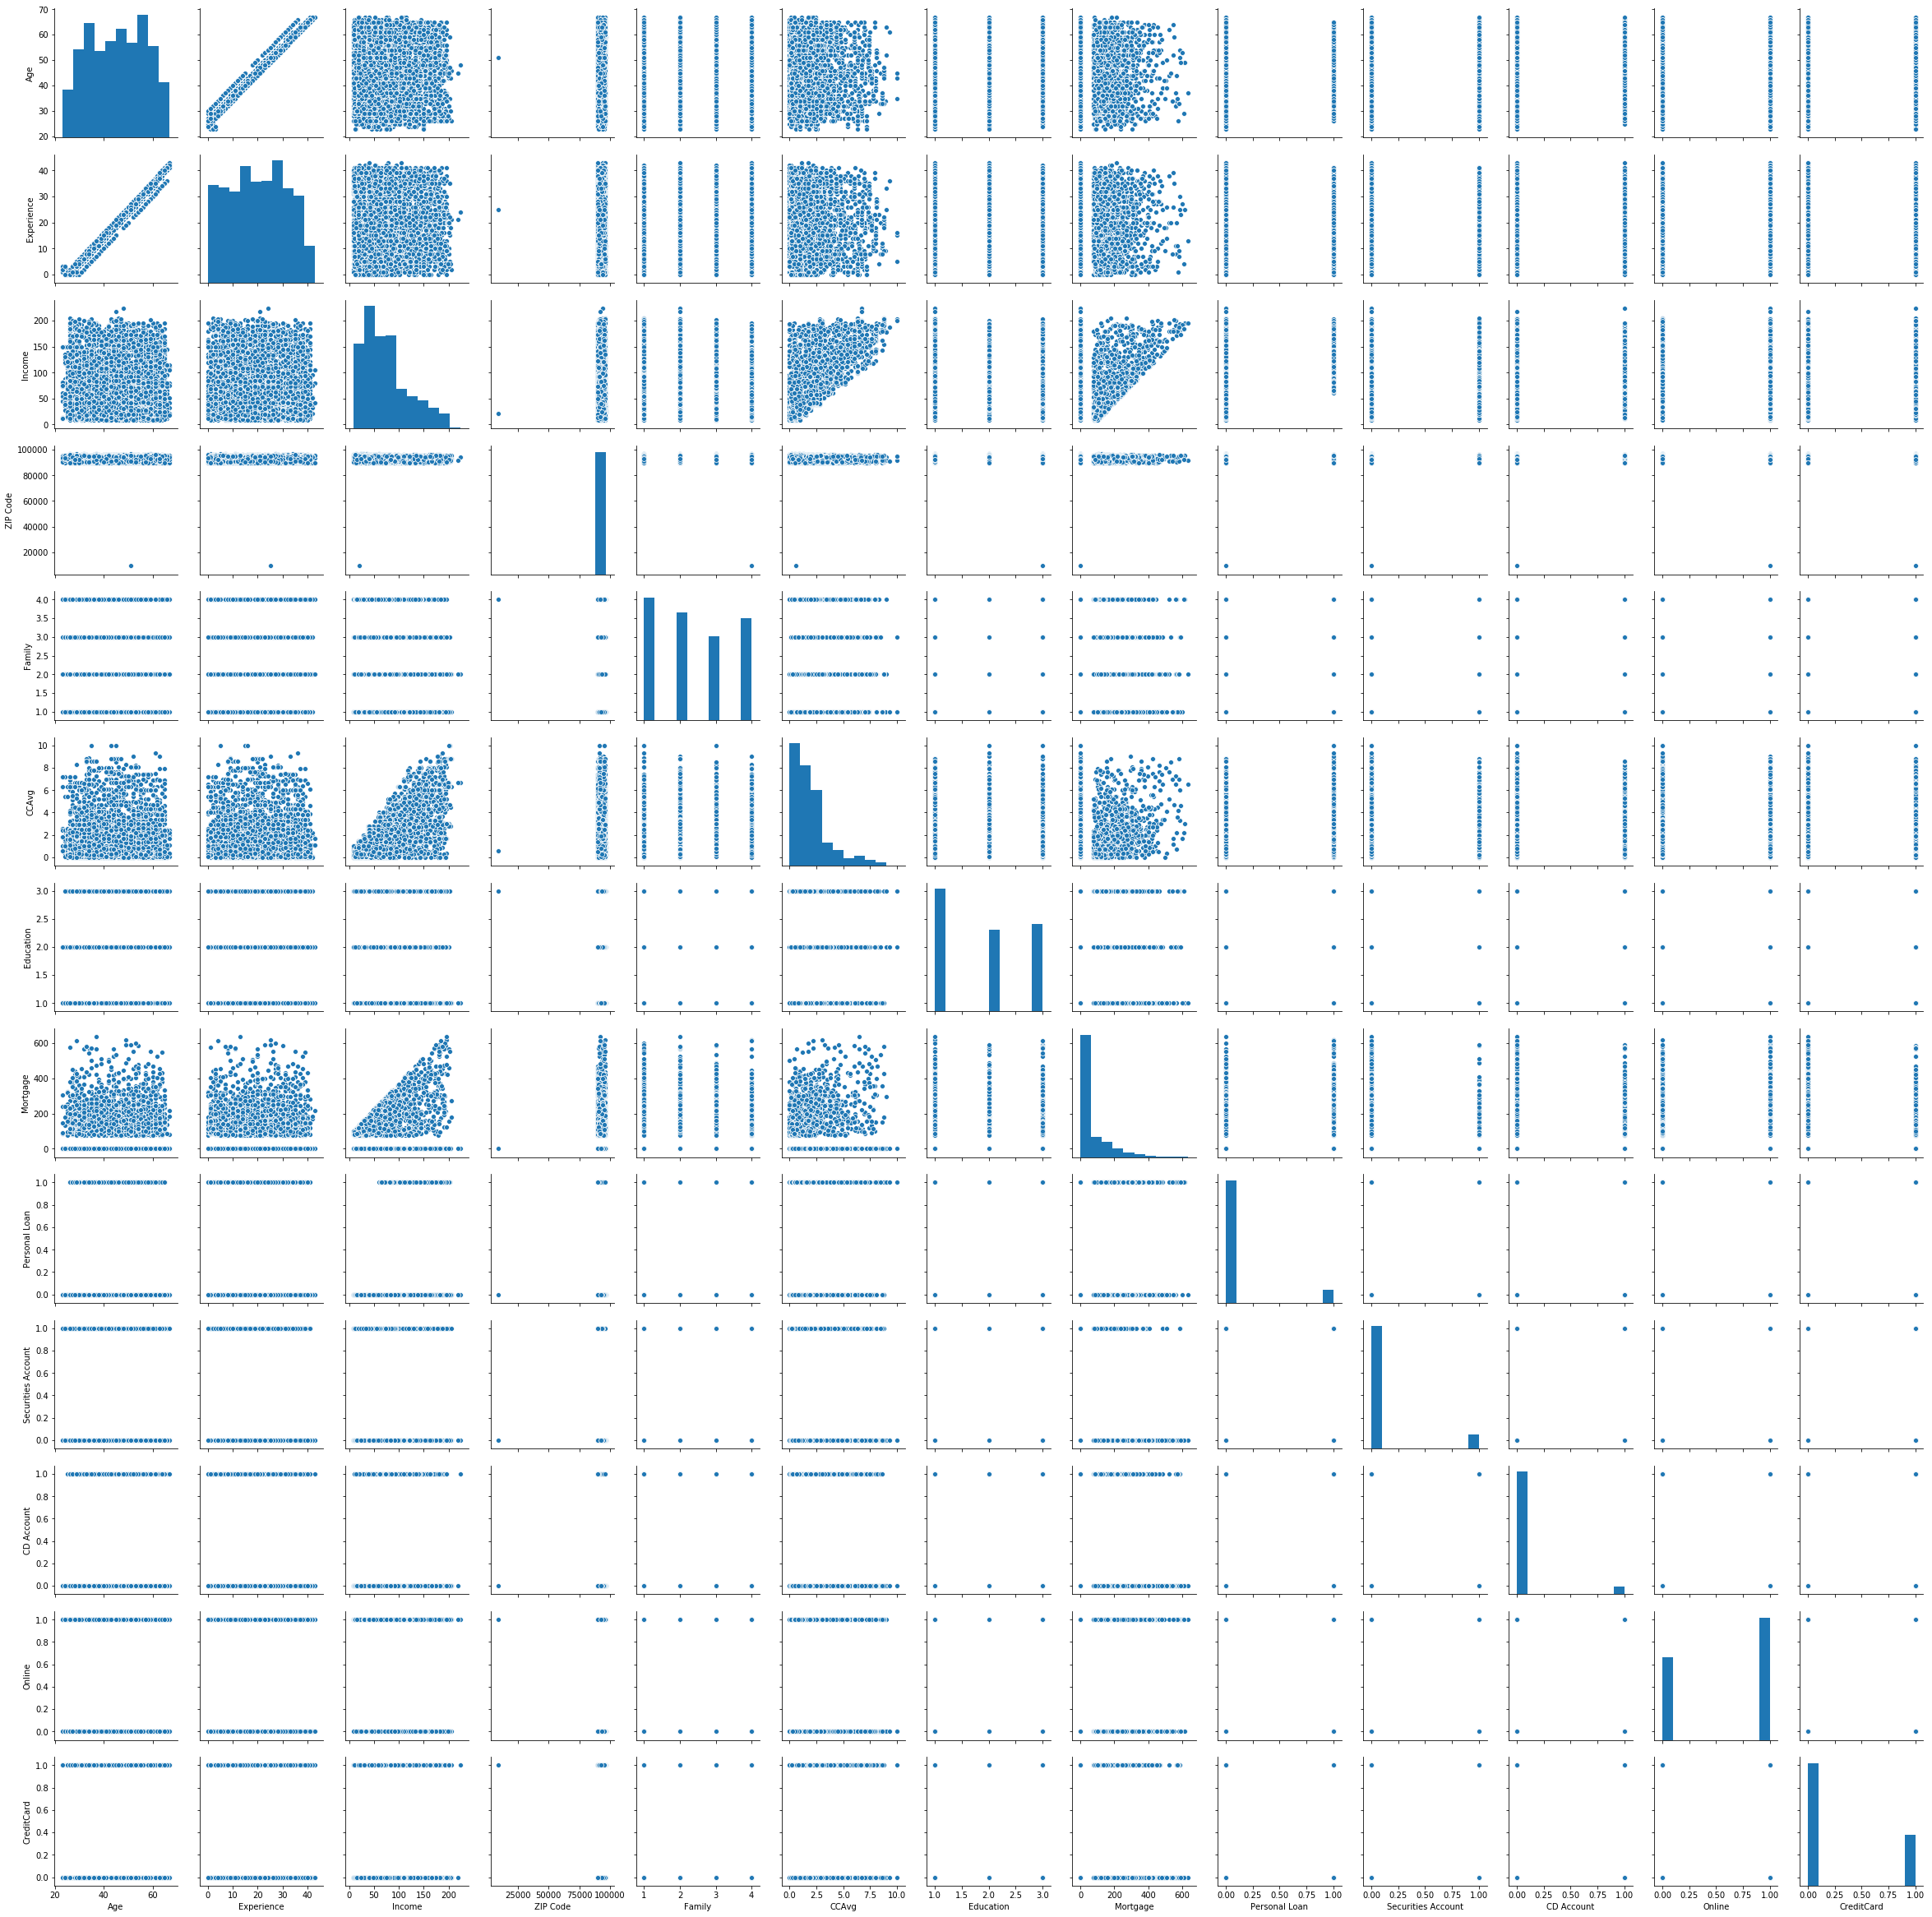

In [24]:
sns.pairplot(bank)

In [25]:
bank.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.0,0.99,-0.055,-0.029,-0.046,-0.052,0.041,-0.013,-0.0077,-0.00044,0.008,0.014,0.0077
Experience,0.99,1.0,-0.047,-0.029,-0.052,-0.05,0.014,-0.011,-0.0083,-0.00099,0.0097,0.014,0.0089
Income,-0.055,-0.047,1.0,-0.016,-0.16,0.65,-0.19,0.21,0.5,-0.0026,0.17,0.014,-0.0024
ZIP Code,-0.029,-0.029,-0.016,1.0,0.012,-0.0041,-0.017,0.0074,0.00011,0.0047,0.02,0.017,0.0077
Family,-0.046,-0.052,-0.16,0.012,1.0,-0.11,0.065,-0.02,0.061,0.02,0.014,0.01,0.012
CCAvg,-0.052,-0.05,0.65,-0.0041,-0.11,1.0,-0.14,0.11,0.37,0.015,0.14,-0.0036,-0.0067
Education,0.041,0.014,-0.19,-0.017,0.065,-0.14,1.0,-0.033,0.14,-0.011,0.014,-0.015,-0.011
Mortgage,-0.013,-0.011,0.21,0.0074,-0.02,0.11,-0.033,1.0,0.14,-0.0054,0.089,-0.006,-0.0072
Personal Loan,-0.0077,-0.0083,0.5,0.00011,0.061,0.37,0.14,0.14,1.0,0.022,0.32,0.0063,0.0028
Securities Account,-0.00044,-0.00099,-0.0026,0.0047,0.02,0.015,-0.011,-0.0054,0.022,1.0,0.32,0.013,-0.015


 ###  Income and CCAvg is moderately correlated while Age and Experience is highly correlated. Income has the best correlation with Personal Loan. 

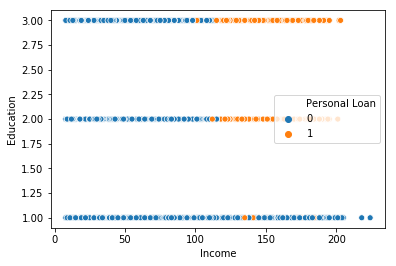

In [26]:
sns.scatterplot(bank['Income'],bank['Education'],data=bank,hue='Personal Loan')

### It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

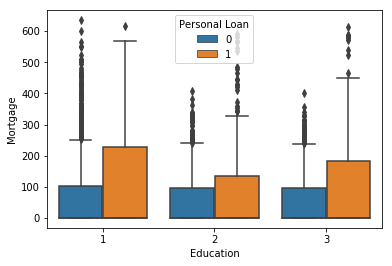

In [27]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=bank)

### Customers who taken loan also have higher mortgages.

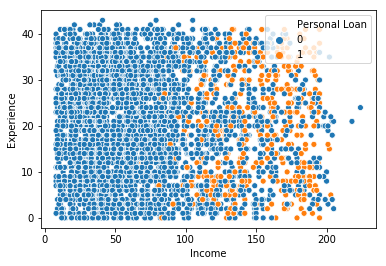

In [28]:
sns.scatterplot(bank['Income'],bank['Experience'],data=bank,hue='Personal Loan')

### From the above plot we can say that people having income more than 100k are likely to opt for personal loan and Income can be a good feature for build model. 

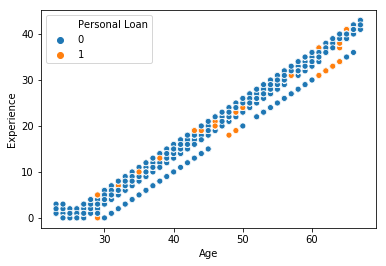

In [29]:
sns.scatterplot(bank['Age'],bank['Experience'],hue=bank['Personal Loan'])

### The above plot show with experience and age have a positive correlation. As experience increase age also increases

# III - Get the target column distribution. Your comments

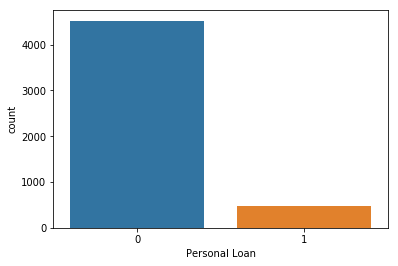

In [30]:
#Target column
sns.countplot(bank['Personal Loan'])

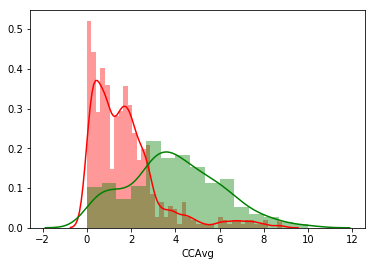

In [31]:
sns.distplot( bank[bank['Personal Loan'] == 0]['CCAvg'], color = 'r')
sns.distplot( bank[bank['Personal Loan'] == 1]['CCAvg'], color = 'g')

### Above graphs show that less number of people have opted for Personal Loan. The graph show persons who have personal loan have a higher credit card average. 

# IV - Split the data into training and test set in the ratio of 70:30 respectively

In [32]:
y=bank['Personal Loan']
X = bank.drop('Personal Loan',axis=1)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

In [34]:
print('Training dataset shape:', x_train.shape, y_train.shape)
print('Testing dataset shape:', x_test.shape, y_test.shape)

Training dataset shape: (3500, 12) (3500,)
Testing dataset shape: (1500, 12) (1500,)


# V - Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)

# VI -  Print the confusion matrix for all the above models (5 points)

# FEATURE SELECTION

In [35]:
# We will first build model using specific features

In [36]:
# Install using following commands
# 1- conda install -c conda-forge mlxtend
# 2- conda install -c conda-forge joblib
   
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# Logistic Regression

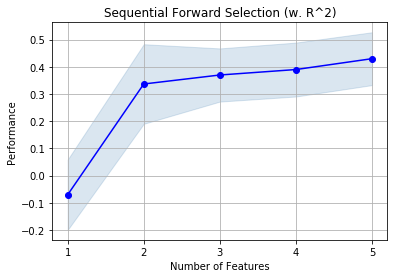

In [37]:
# Build logistic Reg  to use in feature selection
linR = LogisticRegression()

sc=StandardScaler()
scaledx_train = sc.fit_transform(x_train)
scaledx_test = sc.transform(x_test)

# Build step forward feature selection
sfs1 = sfs(linR, k_features=5, forward=True, scoring='r2', cv=10)

# Perform SFFS
sfs1 = sfs1.fit(scaledx_train, y_train)

sfs1.get_metric_dict()

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [38]:
# Which features?
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

[2, 4, 6, 9, 11]
['Income', 'Family', 'Education', 'CD Account', 'CreditCard']


In [39]:
# Build full model with selected features

linR = LogisticRegression()
linR.fit(x_train[subsetColumnList], y_train)

y_train_pred = linR.predict(x_train[subsetColumnList])
print('Training accuracy on selected features: %.3f' % linR.score(x_train[subsetColumnList], y_train))

y_test_pred = linR.predict(x_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' % linR.score(x_test[subsetColumnList], y_test))

print(confusion_matrix(y_test,y_test_pred))

print('class',classification_report(y_test,y_test_pred))

Training accuracy on selected features: 0.952
Testing accuracy on selected features: 0.945
[[1336   15]
 [  67   82]]
class               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.85      0.55      0.67       149

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.90      0.77      0.82      1500
weighted avg       0.94      0.95      0.94      1500



In [40]:
# Build full model on ALL features, for comparison

linR = LogisticRegression()
linR.fit(x_train, y_train)

y_train_pred = linR.predict(x_train)
print('Training accuracy on selected features: %.3f' % linR.score(x_train, y_train))

y_test_pred = linR.predict(x_test)
print('Testing accuracy on selected features: %.3f' % linR.score(x_test, y_test))

print(confusion_matrix(y_test,y_test_pred))

print('class',classification_report(y_test,y_test_pred))

Training accuracy on selected features: 0.910
Testing accuracy on selected features: 0.914
[[1321   30]
 [  99   50]]
class               precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.62      0.34      0.44       149

   micro avg       0.91      0.91      0.91      1500
   macro avg       0.78      0.66      0.70      1500
weighted avg       0.90      0.91      0.90      1500



# Naive Bayes

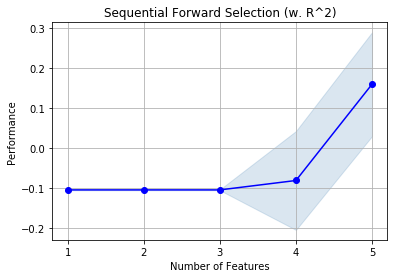

In [41]:
# Build NB  to use in feature selection
gnb = GaussianNB()

sc=StandardScaler()
scaledx_train = sc.fit_transform(x_train)
scaledx_test = sc.transform(x_test)

# Build step forward feature selection
sfs1 = sfs(gnb, k_features=5, forward=True, scoring='r2', cv=10)

# Perform SFFS
sfs1 = sfs1.fit(scaledx_train, y_train)

sfs1.get_metric_dict()

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [42]:
# Which features?
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

[0, 1, 2, 4, 6]
['Age', 'Experience', 'Income', 'Family', 'Education']


In [43]:
# Build full model with selected features

gnb = GaussianNB()
gnb.fit(x_train[subsetColumnList], y_train)

y_train_pred = gnb.predict(x_train[subsetColumnList])
print('Training accuracy on selected features: %.3f' % gnb.score(x_train[subsetColumnList], y_train))

y_test_pred = gnb.predict(x_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' % gnb.score(x_test[subsetColumnList], y_test))

print(confusion_matrix(y_test,y_test_pred))

print('class',classification_report(y_test,y_test_pred))

Training accuracy on selected features: 0.929
Testing accuracy on selected features: 0.928
[[1323   28]
 [  80   69]]
class               precision    recall  f1-score   support

           0       0.94      0.98      0.96      1351
           1       0.71      0.46      0.56       149

   micro avg       0.93      0.93      0.93      1500
   macro avg       0.83      0.72      0.76      1500
weighted avg       0.92      0.93      0.92      1500



In [44]:
# Build full model on ALL features, for comparison

gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_train_pred = gnb.predict(x_train)
print('Training accuracy on selected features: %.3f' % gnb.score(x_train, y_train))

y_test_pred = gnb.predict(x_test)
print('Testing accuracy on selected features: %.3f' % gnb.score(x_test, y_test))

print(confusion_matrix(y_test,y_test_pred))

print('class',classification_report(y_test,y_test_pred))

Training accuracy on selected features: 0.890
Testing accuracy on selected features: 0.882
[[1239  112]
 [  65   84]]
class               precision    recall  f1-score   support

           0       0.95      0.92      0.93      1351
           1       0.43      0.56      0.49       149

   micro avg       0.88      0.88      0.88      1500
   macro avg       0.69      0.74      0.71      1500
weighted avg       0.90      0.88      0.89      1500



# KNN

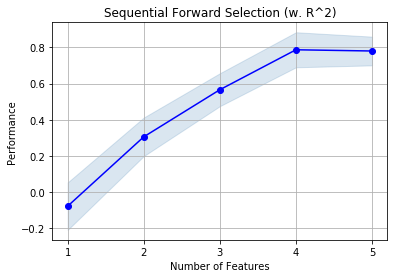

In [45]:
# Build knn  to use in feature selection
knn = KNeighborsClassifier(n_neighbors=3)

sc=StandardScaler()
scaledx_train = sc.fit_transform(x_train)
scaledx_test = sc.transform(x_test)

# Build step forward feature selection
sfs1 = sfs(knn, k_features=5, forward=True, scoring='r2', cv=10)

# Perform SFFS
sfs1 = sfs1.fit(scaledx_train, y_train)

sfs1.get_metric_dict()

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [46]:
# Which features?
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

[2, 4, 5, 6, 9]
['Income', 'Family', 'CCAvg', 'Education', 'CD Account']


In [47]:
# Build full model with selected features

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train[subsetColumnList], y_train)

y_train_pred = knn.predict(x_train[subsetColumnList])
print('Training accuracy on selected features: %.3f' % knn.score(x_train[subsetColumnList], y_train))

y_test_pred = knn.predict(x_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' % knn.score(x_test[subsetColumnList], y_test))

print(confusion_matrix(y_test,y_test_pred))

print('class',classification_report(y_test,y_test_pred))

Training accuracy on selected features: 0.972
Testing accuracy on selected features: 0.954
[[1340   11]
 [  58   91]]
class               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.89      0.61      0.73       149

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.93      0.80      0.85      1500
weighted avg       0.95      0.95      0.95      1500



In [48]:
# Build full model on ALL features, for comparison

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

y_train_pred = knn.predict(x_train)
print('Training accuracy on selected features: %.3f' % knn.score(x_train, y_train))

y_test_pred = knn.predict(x_test)
print('Testing accuracy on selected features: %.3f' % knn.score(x_test, y_test))

print(confusion_matrix(y_test,y_test_pred))

print('class',classification_report(y_test,y_test_pred))

Training accuracy on selected features: 0.940
Testing accuracy on selected features: 0.904
[[1309   42]
 [ 102   47]]
class               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1351
           1       0.53      0.32      0.39       149

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.73      0.64      0.67      1500
weighted avg       0.89      0.90      0.89      1500



#### Observations
KNN algorithm show the highest accuracy with or without feature selections. KNN also is able to lower the false negative rate which helps in better model predicting the liable loan customers. Family as a feature has a low correlation with Personal loan but combining with other features like Income, Education ,CD Account proves to be a good variable for prediction and building model.

# Without Feature Selections

In [49]:
#Split the data into training and test set in the ratio of 70:30 respectively
y=bank['Personal Loan']
X = bank.drop('Personal Loan',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state =3)
print(X_train.shape)
print(y_train.shape)

(3500, 12)
(3500,)


In [50]:
# Scaling data
sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)

# Naive Bayes

Train Accuracy 0.8834285714285715
Test Accuracy 0.886
class               precision    recall  f1-score   support

           0       0.96      0.91      0.94      1349
           1       0.45      0.63      0.53       151

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.70      0.77      0.73      1500
weighted avg       0.91      0.89      0.89      1500



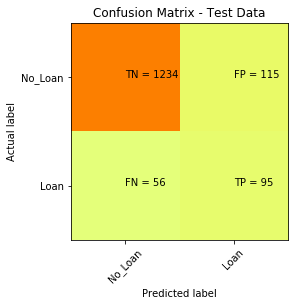

In [51]:
gnb = GaussianNB()
#Train the model using the training sets
gnb.fit(scaledX_train, y_train)
#Predict the response for test dataset
y_pred = gnb.predict(scaledX_test)

# Model Accuracy, how often is the classifier correct?

print('Train Accuracy',gnb.score(scaledX_train,y_train))
print('Test Accuracy',gnb.score(scaledX_test,y_test))
print('class',classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['No_Loan','Loan']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

# Logistic Regression

Train Accuracy 0.954
Test Accuracy 0.9493333333333334
class               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1349
           1       0.80      0.66      0.72       151

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.88      0.82      0.85      1500
weighted avg       0.95      0.95      0.95      1500



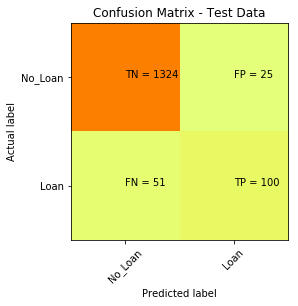

In [52]:
final = LogisticRegression()
final.fit(scaledX_train,y_train)
predicted = final.predict(scaledX_test)
print('Train Accuracy',final.score(scaledX_train,y_train))
print('Test Accuracy',final.score(scaledX_test,y_test))
print('class',classification_report(y_test,predicted))

cm = confusion_matrix(y_test, predicted)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['No_Loan','Loan']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

# KNN

In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
myList = list(range(2,25))
# empty list that will hold cv scores
cv_scores = []
k_neighbors = []
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, scaledX_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 3


Train Accuracy 0.9754285714285714
Test Accuracy 0.9586666666666667
class               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1349
           1       0.94      0.63      0.75       151

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.95      0.81      0.87      1500
weighted avg       0.96      0.96      0.95      1500



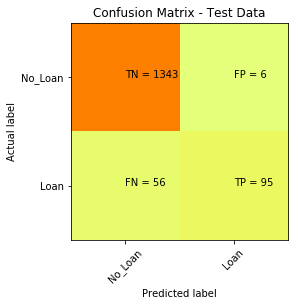

In [54]:
final =KNeighborsClassifier(n_neighbors=3)
final.fit(scaledX_train,y_train)
predicted = final.predict(scaledX_test)
print('Train Accuracy',final.score(scaledX_train,y_train))
print('Test Accuracy',final.score(scaledX_test,y_test))
print('class',classification_report(y_test,predicted))

cm = confusion_matrix(y_test, predicted)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['No_Loan','Loan']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

***Confusion matrix observation***

Out of the 1349 actual instances of ‘no loan Customer’ (first row), the classifier predicted correctly 1343 of them.
Out of the 151 actual instances of ‘Loan Customer’ (second row), the classifier predicted correctly 95 of them.
Out of all 1500 Customers, the classifier predicted correctly 1438 of them.

# VII - Give your reasoning on which is the best model in this case and why it performs better? (5 points)

#### Conclusion
The aim of the bank is to convert there liability customers into loan customers. They want to set up a new marketing campaign, hence, they need information about the connection between the variables given in the data. 3 classification algorithms were used in this study.

**It seems like KNN algorithm have the highest accuracy and we can choose that as our final model**

KNN-classifier can be used when your data set is small enough, so that KNN-Classifier completes running in a shorter time. In general, the complexity of KNN Classifier in Big Oh notation is n2 where n is the number of data points. So, when the data size increases, KNN-Classifier takes a lot of time to run. KNN is able to predict the Loan liable customers better than the other 2 algorithms.

Naive Bayes is an eager learning classifier and it is much faster than K-NN. Thus, it could be used for prediction in real time. The study shows that Naive Bayes has the lowest accuracy out of the 3 algorithms.

Logistic Regression performs better than naive bayes upon colinearity, as naive bayes expects all features to be independent. Logistic regression algorithm is faster than knn aglorithm and shows good accuracy.